In [25]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:05<00:00, 261MB/s]
100% 1.06G/1.06G [00:05<00:00, 216MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
path ='/content/dogs_vs_cats'
classes = os.listdir(path)
classes


['train', 'test']

In [8]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/dogs_vs_cats/test/cats')
dog_dir = os.path.join('/content/dogs_vs_cats/test/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()




Output hidden; open in https://colab.research.google.com to view.

In [9]:
base_dir = '/content/dogs_vs_cats'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)



Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [10]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

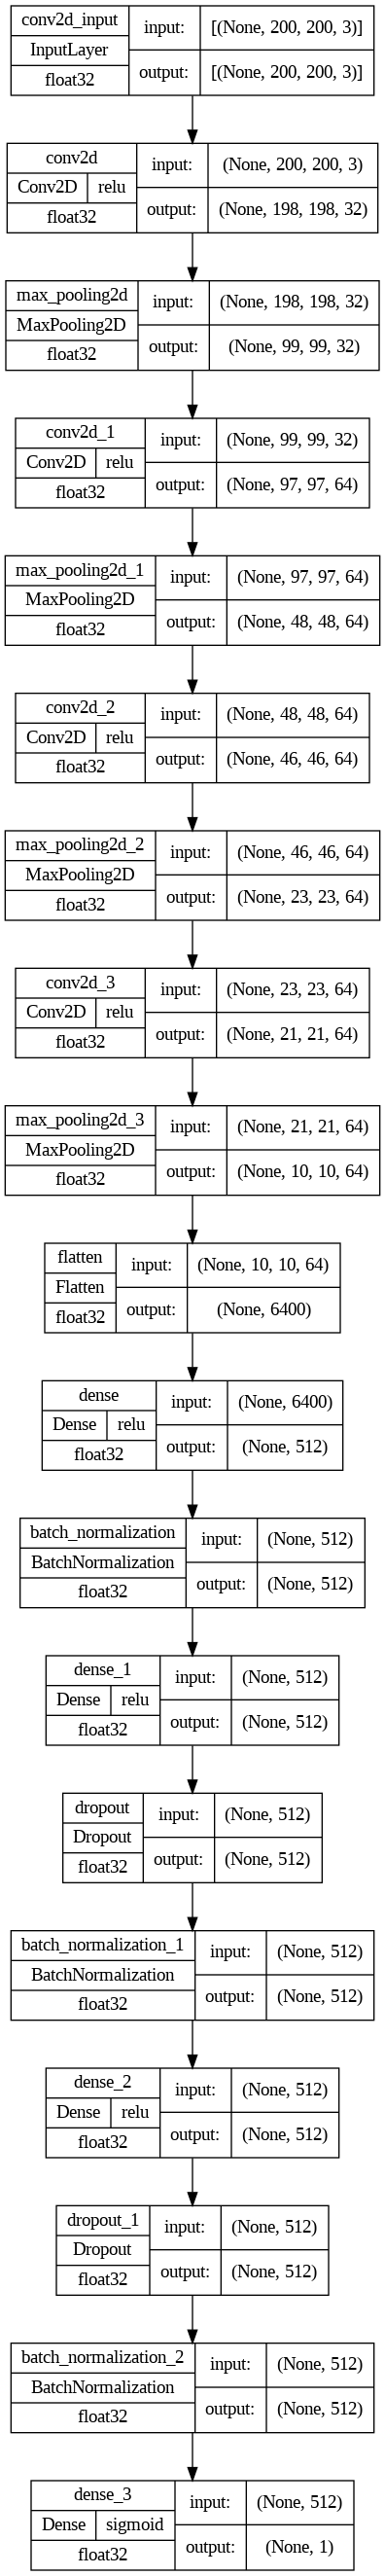

In [12]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)


In [13]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)


In [14]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)

Epoch 1/10
704/704 [==============================] - 55s 61ms/step - loss: 0.5542 - accuracy: 0.7737 - val_loss: 0.5258 - val_accuracy: 0.7924
Epoch 2/10
704/704 [==============================] - 43s 60ms/step - loss: 0.5226 - accuracy: 0.7952 - val_loss: 0.5175 - val_accuracy: 0.7924
Epoch 3/10
704/704 [==============================] - 42s 59ms/step - loss: 0.5151 - accuracy: 0.7980 - val_loss: 0.5185 - val_accuracy: 0.7920
Epoch 4/10
704/704 [==============================] - 42s 60ms/step - loss: 0.5122 - accuracy: 0.7990 - val_loss: 0.5497 - val_accuracy: 0.7924
Epoch 5/10
704/704 [==============================] - 42s 59ms/step - loss: 0.5106 - accuracy: 0.7994 - val_loss: 0.5311 - val_accuracy: 0.7904
Epoch 6/10
704/704 [==============================] - 42s 60ms/step - loss: 0.5089 - accuracy: 0.7997 - val_loss: 0.5163 - val_accuracy: 0.7924
Epoch 7/10
704/704 [==============================] - 43s 60ms/step - loss: 0.5068 - accuracy: 0.8003 - val_loss: 0.5151 - val_accuracy:

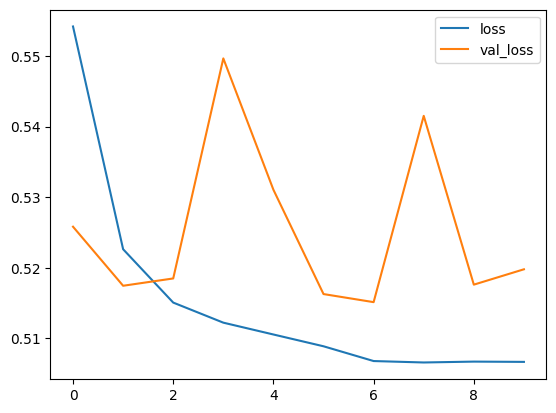

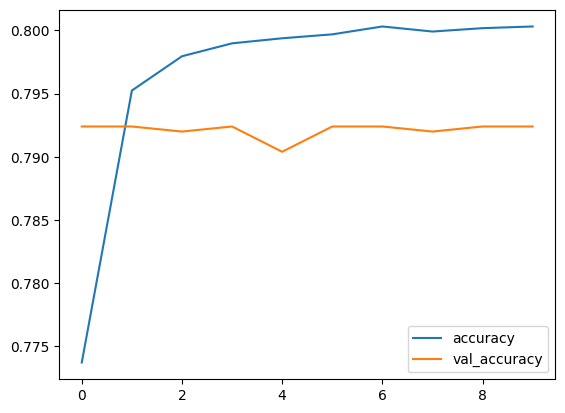

In [15]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 442ms/step
Cat


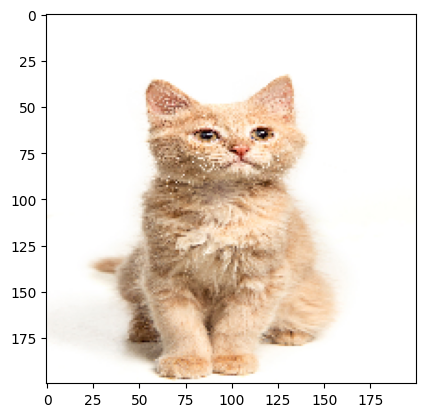

In [19]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/red-white-cat-i-white-studio.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=1):
   print("Dog")
else:
   print("Cat")

1/1 [==============================] - 0s 22ms/step
Dog


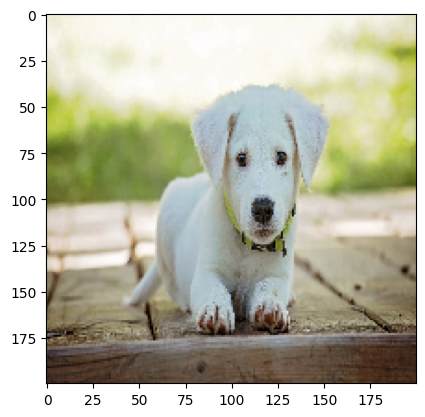

In [22]:
test_image = image.load_img('/content/puppy-1903313_1280.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >=0.5):
	print("Dog")
else:
	print("Cat")
